# Application Classes for Optimization Problems

We introduce application classes for the a few popular optimization problems so that users can easily try various optimization problems on quantum computers.

Qiskit is an open source SDK for working with quantum computers at the level of pulses, circuits and application modules.

We walk through examples of the vertex cover problem and the knapsack problem in this tutorial:

- Vertex cover problem
  - Given an undirected graph, find a subset of nodes with the minimum size such that each edge has at least one endpoint in the subsets.
- Knapsack problem
  - Given a set of items, find a subset of items such that the total weight is within the capacity and the total value is maximized.

Examples of the max-cut problem and the traveling salesman problem are available in [Max-Cut and Traveling Salesman Problem](https://github.com/Qiskit/qiskit-tutorials/blob/master/tutorials/optimization/6_examples_max_cut_and_tsp.ipynb).

## Table of Contents

0. [Additional application problems](#add-prob)
1. [Import the libraries](#import)
2. [Vertex cover problem](#vertex)
3. [Knapsack problem](#knapsack)
4. [How to check the Hamiltonian](#check-ham)

<a id = "add-prob"></a>
### Additional application problems

#### General problems

1. Exact cover problem
  - Given a collection of subsets of items, find a subcollection such that each item is covered exactly once.
3. Number partition problem
  - Given a multiset of positive integers, find a partition of the multiset into two subsets such that the sums of the subsets are equal.
4. Set packing problem
  - Given a collection of subsets of items, find a subcollection such that all subsets of the subcollection are pairwise disjoint and the number of items in the subcollection is maximized.

#### Graph problems

5. Clique problem
  - Given an undirected graph, find a subset of nodes with a specified number or the maximum number such that the induced subgraph is complete.
6. Graph partition problem
  - Given an undirected graph, find a partition into two components whose sizes are equal such that the total capacity of the edges between the two components is minimized.
7. Max-cut problem
  - Given an undirected graph, find a partition of nodes into two subsets such that the total weight of the edges between the two subsets is maximized. 
8. Stable set problem
  - Given an undirected graph, find a subset of nodes such that no edge connects the nodes in the subset and the number of nodes is maximized.
9. Traveling salesman problem
  - Given a graph, find a route with the minimum distance such that the route visits each city exactly once.
10. Vehicle routing problem
  - Given a graph, a depot node, and the number of vehicles (routes), find a set of routes such that each node is covered exactly once except the depot and the total distance of the routes is minimized.

The application classes for graph problems (`GraphOptimizationApplication`) provide a functionality to draw graphs of an instance and a result.
Note that you need to install `matplotlib` beforehand to utilize the functionality.

<a id = "import"></a>
## Import the libraries

## Import the libraries

We first import packages necessary for application classes. We encourage installing Qiskit via the pip tool (a python package manager).

`pip` will handle all dependencies automatically and you will always install the latest (and well-tested) version.

The Qiskit Optimization package covers the whole range from high-level modeling of optimization problems, with automatic conversion of problems to different required representations, to a suite of easy-to-use quantum optimization algorithms that are ready to run on classical simulators, as well as on real quantum systems.

If you want to work on the very latest work-in-progress versions, learn more about Qiskit, or if you want to contribute to Qiskit Optimization visit `qiskit.org` for more information

In [1]:
pip install -q qiskit

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -q qiskit_optimization

Note: you may need to restart the kernel to use updated packages.


In [3]:
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit import Aer
from qiskit.utils import algorithm_globals, QuantumInstance
from qiskit.algorithms import QAOA, NumPyMinimumEigensolver

<a id = "vertex"></a>
## Vertex cover problem

We introduce the application class for the vertex cover problem as an example of graph problems.
Given an undirected graph, the vertex cover problem asks us to find a subset of nodes with the minimum size such that all edges are covered by any node selected.

We import the application class `VertexCover` for the vertex cover problem and `networkx` to generate a random graph.


In [4]:
!pip install networkx==2.2

In [5]:
!pip install matplotlib==2.2.3

In [6]:
from qiskit_optimization.applications.vertex_cover import VertexCover
import networkx as nx

seed = 123
algorithm_globals.random_seed = seed
qins = QuantumInstance(backend=Aer.get_backend('qasm_simulator'), shots=1000, seed_simulator=seed, seed_transpiler=seed)

In [7]:
graph = nx.random_regular_graph(d=3, n=6, seed=seed)
pos = nx.spring_layout(graph, seed=seed)

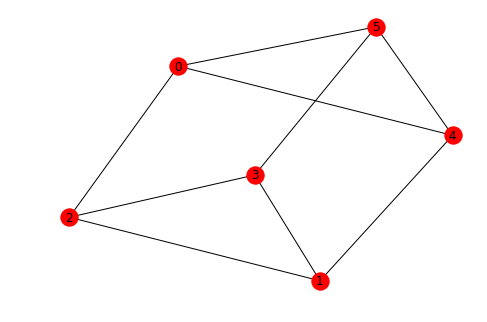

In [8]:
prob = VertexCover(graph)
prob.draw(pos=pos)

`VertexCover` takes a graph as an instance and `to_quadratic_program` generates a corresponding `QuadraticProgram` of the instance of the vertex cover problem.

In [9]:
qp = prob.to_quadratic_program()
qp

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Vertex cover

Minimize
 obj: x_0 + x_1 + x_2 + x_3 + x_4 + x_5
Subject To
 c0: x_1 + x_2 >= 1
 c1: x_1 + x_4 >= 1
 c2: x_1 + x_3 >= 1
 c3: x_2 + x_3 >= 1
 c4: x_0 + x_2 >= 1
 c5: x_0 + x_4 >= 1
 c6: x_0 + x_5 >= 1
 c7: x_4 + x_5 >= 1
 c8: x_3 + x_5 >= 1

Bounds
 0 <= x_0 <= 1
 0 <= x_1 <= 1
 0 <= x_2 <= 1
 0 <= x_3 <= 1
 0 <= x_4 <= 1
 0 <= x_5 <= 1

Binaries
 x_0 x_1 x_2 x_3 x_4 x_5
End

You can solve the problem as follows. `NumPyMinimumEigensolver` finds the minimum eigen vector. You can also apply QAOA. Note that the solution by QAOA is not always optimal.

result:
 optimal function value: 4.0
optimal value: [0. 0. 1. 1. 1. 1.]
status: SUCCESS

solution:
 [2, 3, 4, 5]


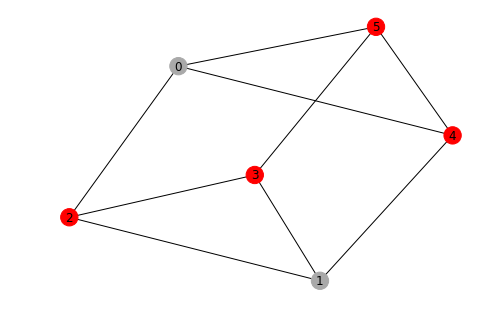

In [10]:
# Numpy Eigensolver
meo = MinimumEigenOptimizer(min_eigen_solver=NumPyMinimumEigensolver())
result = meo.solve(qp)
print('result:\n', result)
print('\nsolution:\n', prob.interpret(result))
prob.draw(result, pos=pos)

result:
 optimal function value: 4.0
optimal value: [1. 1. 0. 1. 1. 0.]
status: SUCCESS

solution:
 [0, 1, 3, 4]

time: 0.21283698081970215


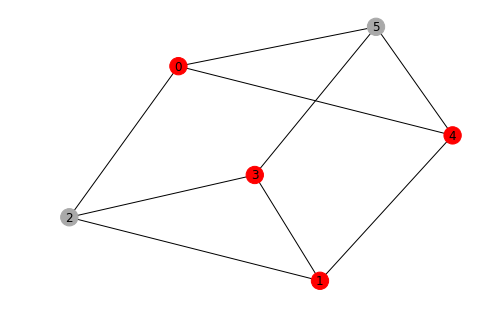

In [11]:
# QAOA
meo = MinimumEigenOptimizer(min_eigen_solver=QAOA(reps=1, quantum_instance=qins))
result = meo.solve(qp)
print('result:\n', result)
print('\nsolution:\n', prob.interpret(result))
print('\ntime:', result.min_eigen_solver_result.optimizer_time)
prob.draw(result, pos=pos)

<a id = "knapsack"></a>
## Knapsack problem

The knapsack problem asks us to find a combination of items such that the total weight is within the capacity of the knapsack and maximize the total value of the items.
The following examples solve an instance of the knapsack problem with 5 items by Numpy eigensolver and QAOA.

In [12]:
from qiskit_optimization.applications import Knapsack

In [13]:
prob = Knapsack(values = [3, 4, 5, 6, 7], weights = [2, 3, 4, 5, 6], max_weight=10)
qp = prob.to_quadratic_program()
qp

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Knapsack

Maximize
 obj: 3 x_0 + 4 x_1 + 5 x_2 + 6 x_3 + 7 x_4
Subject To
 c0: 2 x_0 + 3 x_1 + 4 x_2 + 5 x_3 + 6 x_4 <= 10

Bounds
 0 <= x_0 <= 1
 0 <= x_1 <= 1
 0 <= x_2 <= 1
 0 <= x_3 <= 1
 0 <= x_4 <= 1

Binaries
 x_0 x_1 x_2 x_3 x_4
End

In [14]:
# Numpy Eigensolver
meo = MinimumEigenOptimizer(min_eigen_solver=NumPyMinimumEigensolver())
result = meo.solve(qp)
print('result:\n', result)
print('\nsolution:\n', prob.interpret(result))

result:
 optimal function value: 13.0
optimal value: [1. 1. 0. 1. 0.]
status: SUCCESS

solution:
 [0, 1, 3]


In [15]:
# QAOA
meo = MinimumEigenOptimizer(min_eigen_solver=QAOA(reps=1, quantum_instance=qins))
result = meo.solve(qp)
print('result:\n', result)
print('\nsolution:\n', prob.interpret(result))
print('\ntime:', result.min_eigen_solver_result.optimizer_time)

result:
 optimal function value: 13.0
optimal value: [1. 1. 0. 1. 0.]
status: SUCCESS

solution:
 [0, 1, 3]

time: 6.871398210525513


<a id = "check-ham"></a>
## How to check the Hamiltonian

If you want to check the actual Hamiltonian generated from your problem instance, you need to apply a converter as follows.

In [16]:
from qiskit_optimization.converters import QuadraticProgramToQubo

In [17]:
# the same knapsack problem instance as in the previous section
prob = Knapsack(values = [3, 4, 5, 6, 7], weights = [2, 3, 4, 5, 6], max_weight=10)
qp = prob.to_quadratic_program()
qp

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Knapsack

Maximize
 obj: 3 x_0 + 4 x_1 + 5 x_2 + 6 x_3 + 7 x_4
Subject To
 c0: 2 x_0 + 3 x_1 + 4 x_2 + 5 x_3 + 6 x_4 <= 10

Bounds
 0 <= x_0 <= 1
 0 <= x_1 <= 1
 0 <= x_2 <= 1
 0 <= x_3 <= 1
 0 <= x_4 <= 1

Binaries
 x_0 x_1 x_2 x_3 x_4
End

In [18]:
# intermediate QUBO form of the optimization problem
conv = QuadraticProgramToQubo()
qubo = conv.convert(qp)
qubo

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Knapsack

Minimize
 obj: - 1043 x_0 - 1564 x_1 - 2085 x_2 - 2606 x_3 - 3127 x_4
      - 520 c0@int_slack@0 - 1040 c0@int_slack@1 - 2080 c0@int_slack@2
      - 1560 c0@int_slack@3 + [ 208 x_0^2 + 624 x_0*x_1 + 832 x_0*x_2
      + 1040 x_0*x_3 + 1248 x_0*x_4 + 208 x_0*c0@int_slack@0
      + 416 x_0*c0@int_slack@1 + 832 x_0*c0@int_slack@2 + 624 x_0*c0@int_slack@3
      + 468 x_1^2 + 1248 x_1*x_2 + 1560 x_1*x_3 + 1872 x_1*x_4
      + 312 x_1*c0@int_slack@0 + 624 x_1*c0@int_slack@1
      + 1248 x_1*c0@int_slack@2 + 936 x_1*c0@int_slack@3 + 832 x_2^2
      + 2080 x_2*x_3 + 2496 x_2*x_4 + 416 x_2*c0@int_slack@0
      + 832 x_2*c0@int_slack@1 + 1664 x_2*c0@int_slack@2
      + 1248 x_2*c0@int_slack@3 + 1300 x_3^2 + 3120 x_3*x_4
      + 520 x_3*c0@int_slack@0 + 1040 x_3*c0@int_slack@1
      + 2080 x_3*c0@int_slack@2 + 1560 x_3*c0@int_slack@3 + 1872 x_4^2
      + 624 x_4*c0@int_slack@0 + 1248 x_4*c0@int_slack@1
      +

In [19]:
# qubit Hamiltonian and offset
op, offset = qubo.to_ising()
print(f'num qubits: {op.num_qubits}, offset: {offset}\n')
print(op)

num qubits: 9, offset: 1417.5

-390.0 * ZIIIIIIII
- 520.0 * IZIIIIIII
+ 156.0 * ZZIIIIIII
- 260.0 * IIZIIIIII
+ 78.0 * ZIZIIIIII
+ 104.0 * IZZIIIIII
- 130.0 * IIIZIIIII
+ 39.0 * ZIIZIIIII
+ 52.0 * IZIZIIIII
+ 26.0 * IIZZIIIII
- 776.5 * IIIIZIIII
+ 234.0 * ZIIIZIIII
+ 312.0 * IZIIZIIII
+ 156.0 * IIZIZIIII
+ 78.0 * IIIZZIIII
- 647.0 * IIIIIZIII
+ 195.0 * ZIIIIZIII
+ 260.0 * IZIIIZIII
+ 130.0 * IIZIIZIII
+ 65.0 * IIIZIZIII
+ 390.0 * IIIIZZIII
- 517.5 * IIIIIIZII
+ 156.0 * ZIIIIIZII
+ 208.0 * IZIIIIZII
+ 104.0 * IIZIIIZII
+ 52.0 * IIIZIIZII
+ 312.0 * IIIIZIZII
+ 260.0 * IIIIIZZII
- 388.0 * IIIIIIIZI
+ 117.0 * ZIIIIIIZI
+ 156.0 * IZIIIIIZI
+ 78.0 * IIZIIIIZI
+ 39.0 * IIIZIIIZI
+ 234.0 * IIIIZIIZI
+ 195.0 * IIIIIZIZI
+ 156.0 * IIIIIIZZI
- 258.5 * IIIIIIIIZ
+ 78.0 * ZIIIIIIIZ
+ 104.0 * IZIIIIIIZ
+ 52.0 * IIZIIIIIZ
+ 26.0 * IIIZIIIIZ
+ 156.0 * IIIIZIIIZ
+ 130.0 * IIIIIZIIZ
+ 104.0 * IIIIIIZIZ
+ 78.0 * IIIIIIIZZ


In [20]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright

# <hr>
Copyright © 2021 IBM. This notebook and its source code are released under the terms of the MIT License.